In [1]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


class VisionTransformerPilot:
    def __init__(self):
        self.model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")    

    def vector_product(self, images, text):
        classes = ["This is a picture of " + text, "This is not a picture of " + text]

        inputs = self.processor(text=classes, images=images, return_tensors="pt", padding=True)
        outputs = self.model(**inputs)
        logits_per_image = outputs.logits_per_image 
        probs = logits_per_image.softmax(dim=1) 

        # # Plot
        # fig, ax = plt.subplots(figsize=(10, 6))

        # # Define colors for each class
        # colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))

        # # Plot horizontal bars for the single image
        # bar_width = 0.5
        # y_pos = np.arange(len(classes))
        # ax.barh(y_pos, probs.detach().numpy()[0], height=bar_width, color=colors)

        # # Customize plot
        # ax.set_yticks(y_pos)
        # ax.set_yticklabels(classes)
        # ax.invert_yaxis()  # Invert y-axis to display top-to-bottom
        # ax.set_xlabel('Probability')
        # ax.set_title('Image-Text Similarity Probabilities for Image1')

        # plt.show()

        return probs[0][0] > probs[0][1]

/home/samir/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = Image.open("/home/samir/Desktop/ARIMA/colab/server/ml/image_ml_lib/temp/drink.jpg")

In [3]:
import os
from PIL import Image

def read_images_in_folder(folder_path):
    images = []
    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is an image file
        if file_name.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            # Construct the full path to the image file
            image_path = os.path.join(folder_path, file_name)
            # Open the image using PIL
            image = Image.open(image_path)
            # Append the image to the list
            images.append(image)
    return images

# Example usage:
folder_path = "/home/samir/Desktop/ARIMA/colab/server/ml/image_ml_lib/temp/my_samples"
images = read_images_in_folder(folder_path)


In [4]:
vit = VisionTransformerPilot()

In [5]:
vit.vector_product(images, "a person holding protein shaker smiling")

tensor(True)

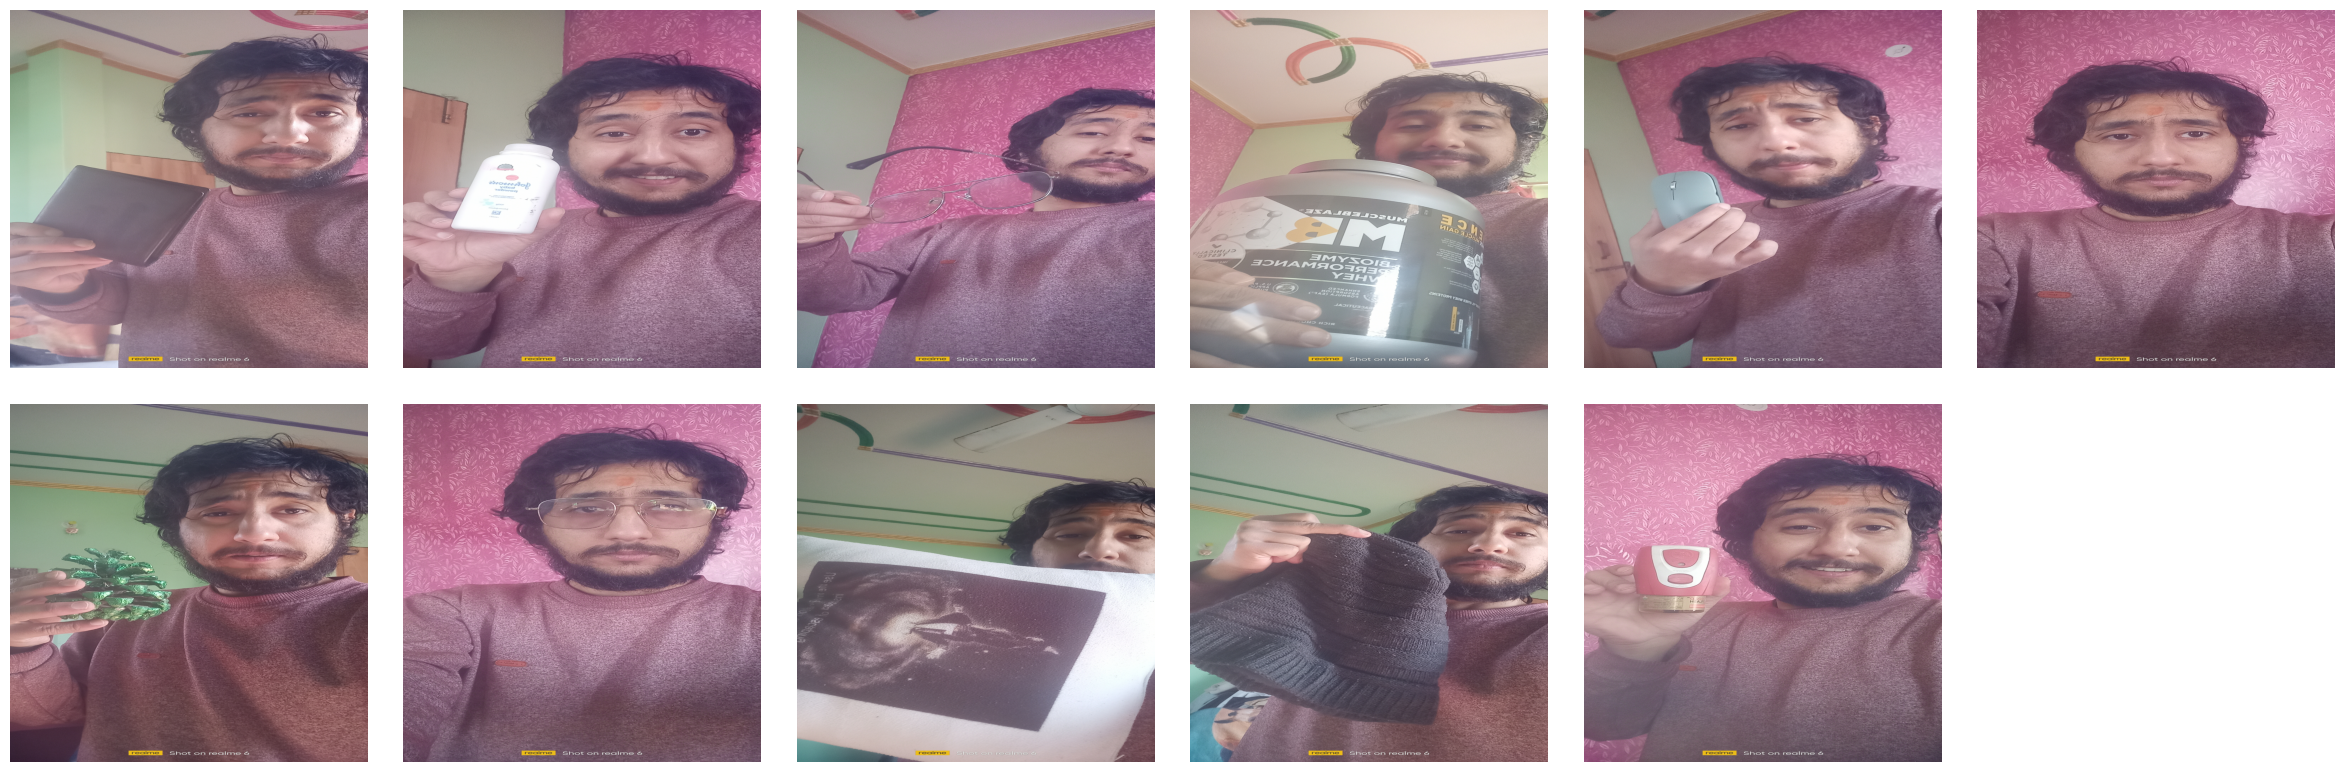

In [6]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

def display_images_in_grid(images, grid_size=(4, 6)):
    fig = plt.figure(figsize=(30, 20))  # Adjust the figsize as needed
    gs = gridspec.GridSpec(grid_size[0], grid_size[1], wspace=0.1, hspace=0.1)

    # Plot each image in the grid
    for i, image in enumerate(images):
        ax = plt.subplot(gs[i])
        ax.imshow(image)
        ax.set_aspect('auto')  # Set aspect ratio to 'auto' to keep the images wider
        ax.axis('off')

    plt.show()

# Example usage:
display_images_in_grid(images)


In [10]:
bool(vit.vector_product(images, "a person holding cap").detach().numpy())

True